<a href="https://colab.research.google.com/github/vk26kumar/OIBSIP/blob/main/UNEMPLOYMENT_ANALYSIS_USING_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAME-VISHAL KUMAR

DATA SCIENCE PROJECT INTERNSHIP

OASIS  INFOBYTE

**TASK-2 UNEMPLOYMENT  ANALYSIS USING PYTHON**

 ***Problem Statement*** -Unemployment is measured by the unemployment rate which is the number of people who are unemployed as a percentage of the total labour force. We have seen a sharp increase in the unemployment rate during Covid-19, so analyzing the unemployment rate can be a good data science project.

IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import warnings


In [2]:
warnings.filterwarnings("ignore")

IMPORTING THE DATA

In [3]:
data = pd.read_csv("/content/Unemployment_Rate_upto_11_2020.csv")
data


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [5]:
#describing the dataset
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [6]:
data.isnull().sum()

,0
Region,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Region.1,0
longitude,0
latitude,0


In [7]:
#rename colums
data.columns = ['States','Date','Frequency','Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate','Region','longitude','latitude']
data.head()

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


CHECKING THE CORELATION BETWEEN THE FEATURES OF DATASET

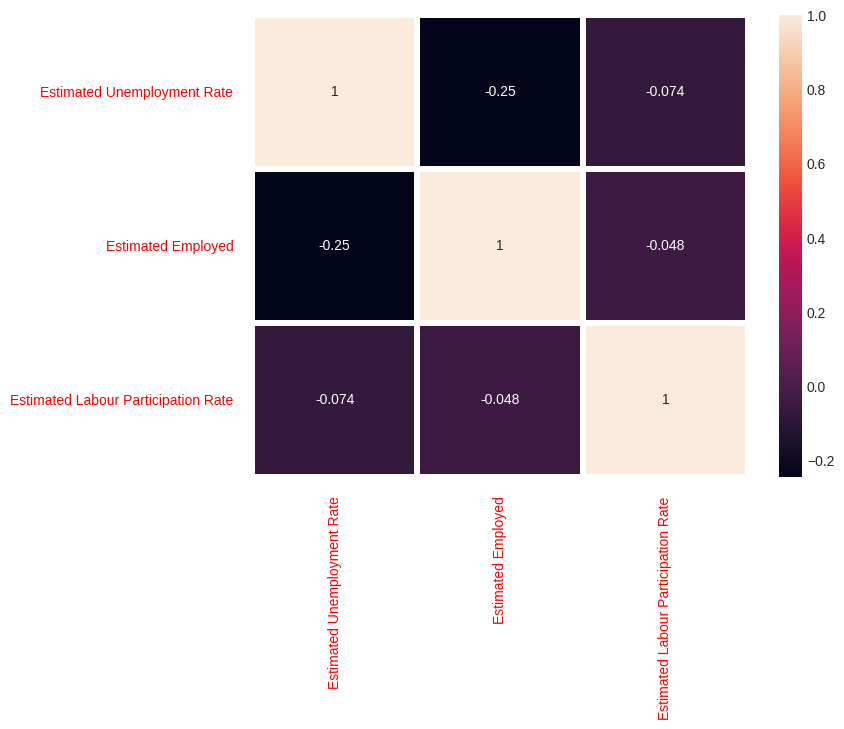

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
data.describe()

data.isnull().sum()


data.columns = ['States','Date','Frequency','Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate','Region','longitude','latitude']
data.head()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(8,6))

ax = sns.heatmap(data[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']].corr(), annot=True, linewidth=3)
ax.tick_params(size=10, color='w', labelsize=10, labelcolor='red')

plt.show()

NO OF EMPLOYEE ACCORDING TO DIFFERENT REGION OF INDIA

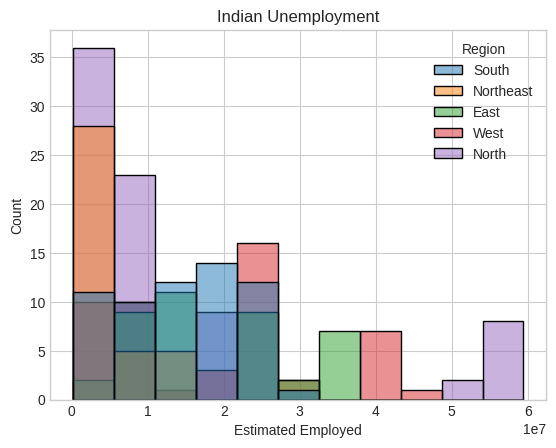

In [15]:

data.columns=['States', 'Date', 'Frequency', 'Estimated Unemployment Rate',
              'Estimated Employed', 'Estimated Labour Participation Rate',
              'Region', 'Longitude', 'Latitude']
plt.title('Indian Unemployment')
sns.histplot(x='Estimated Employed', hue='Region', data=data)
plt.show()

UNEMPLOYMENT RATE IN DIFFERENT REGION OF **INDIA**

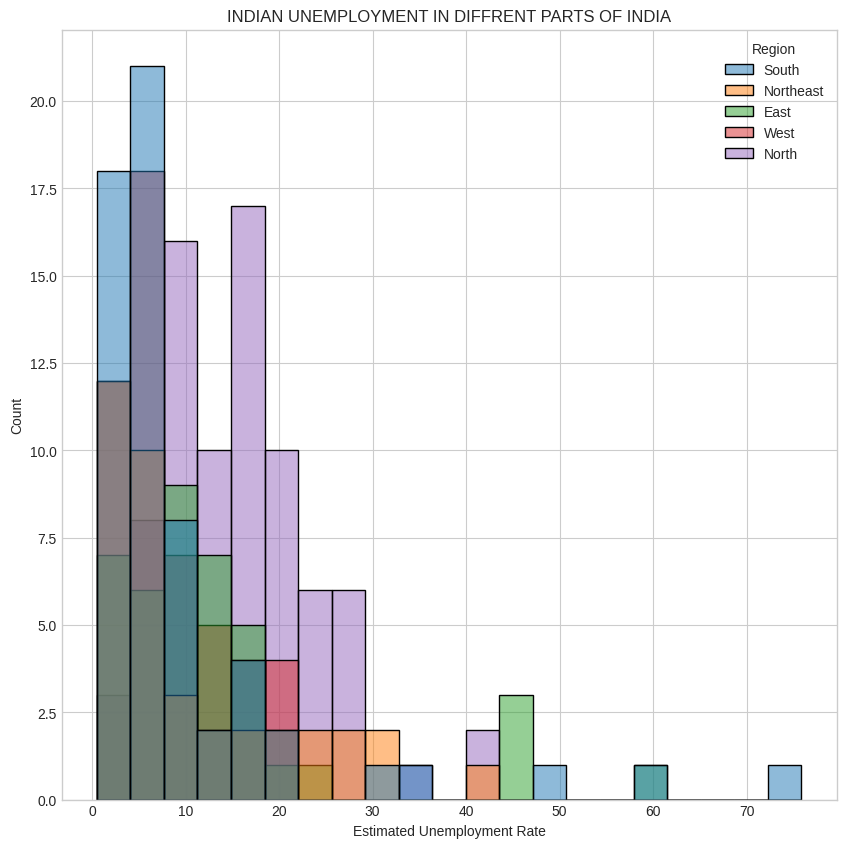

In [18]:
plt.figure(figsize=(10,10))
plt.title("INDIAN UNEMPLOYMENT IN DIFFRENT PARTS OF INDIA")
sns.histplot(x="Estimated Unemployment Rate", hue='Region', data=data)
plt.show()

Estimated Unemployment Rate in every Indian state

In [38]:

unemployment = data[['States', 'Region', 'Estimated Unemployment Rate']]
plt = px.sunburst(unemployment, path=['Region', 'States'],
                     values='Estimated Unemployment Rate',
                     width=700, height=700,
                     color_continuous_scale='Red',
                     title="Unemployment Rate in India")
plt.show()

THE END